<a href="https://colab.research.google.com/github/Saritah22/se-alessysistemas/blob/main/parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**primer punto**
 Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de  5kHz , entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua  x(t)=0.3cos(1000πt−π/4)+0.6sin(2000πt)+0.1cos(11000πt−π) ?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal  x(t) .

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.



calculos realizados


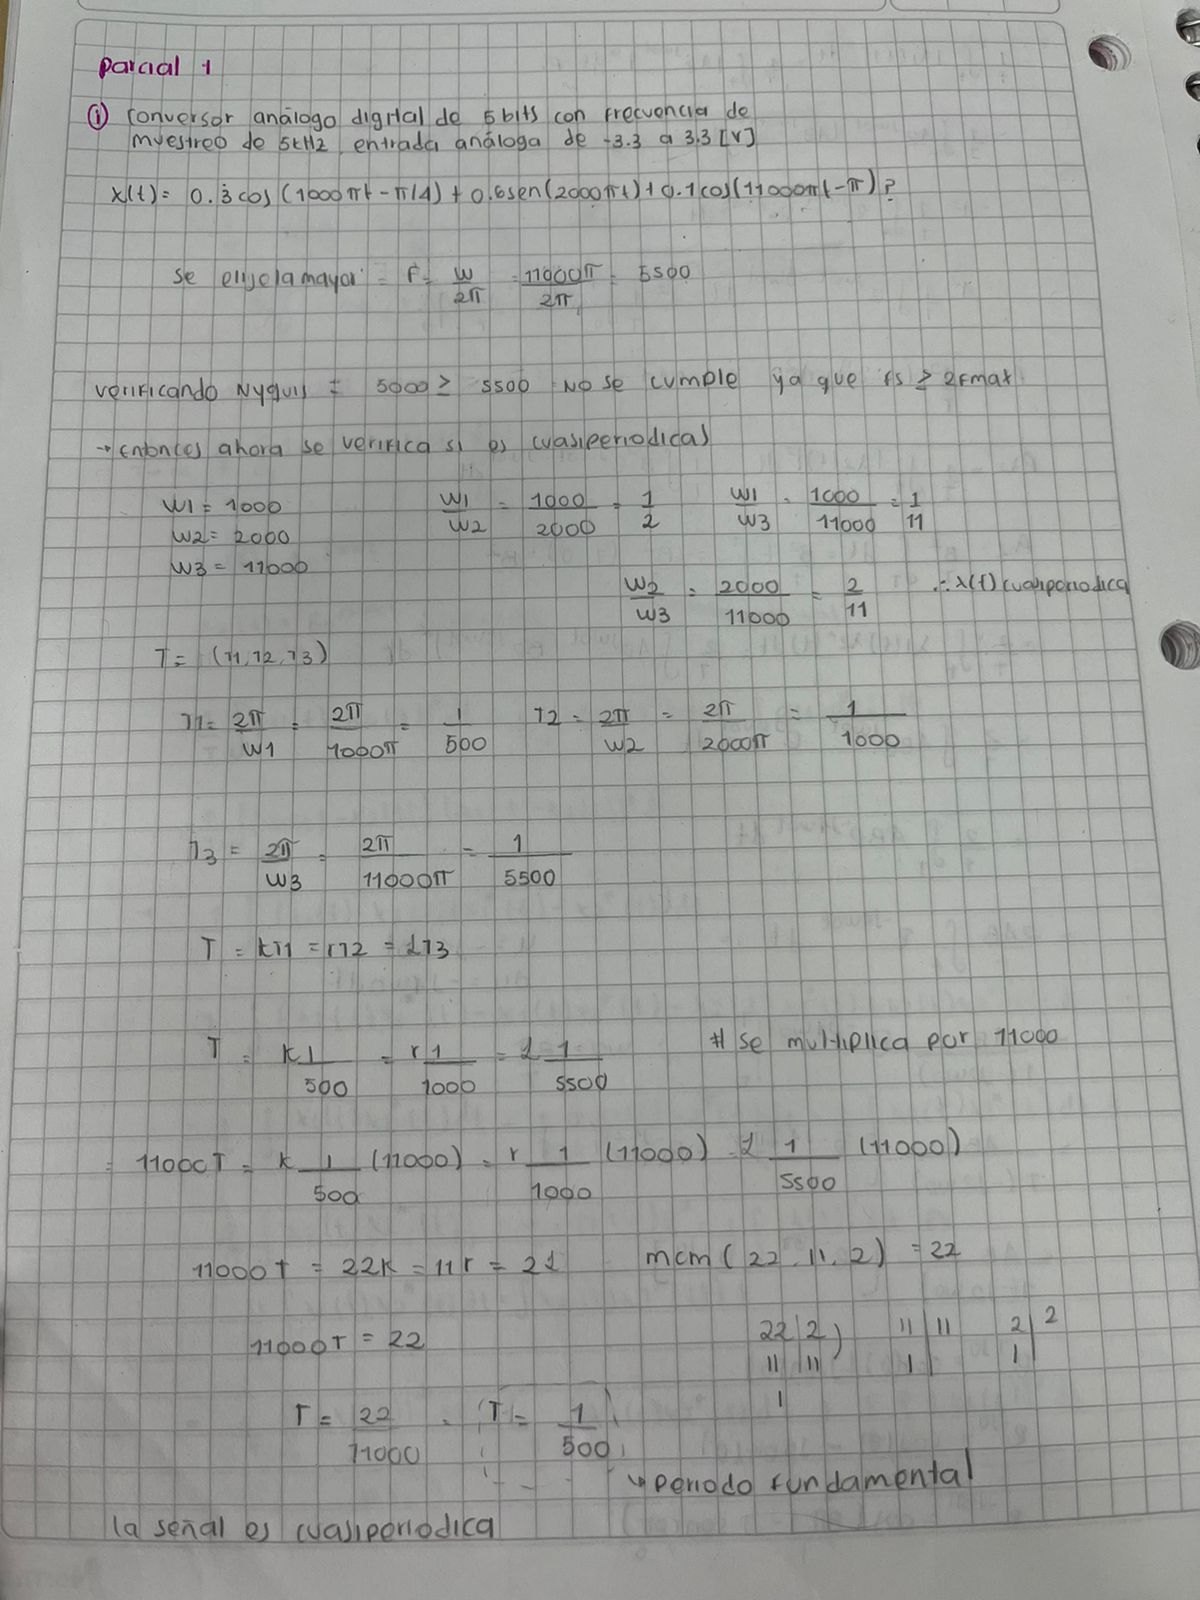

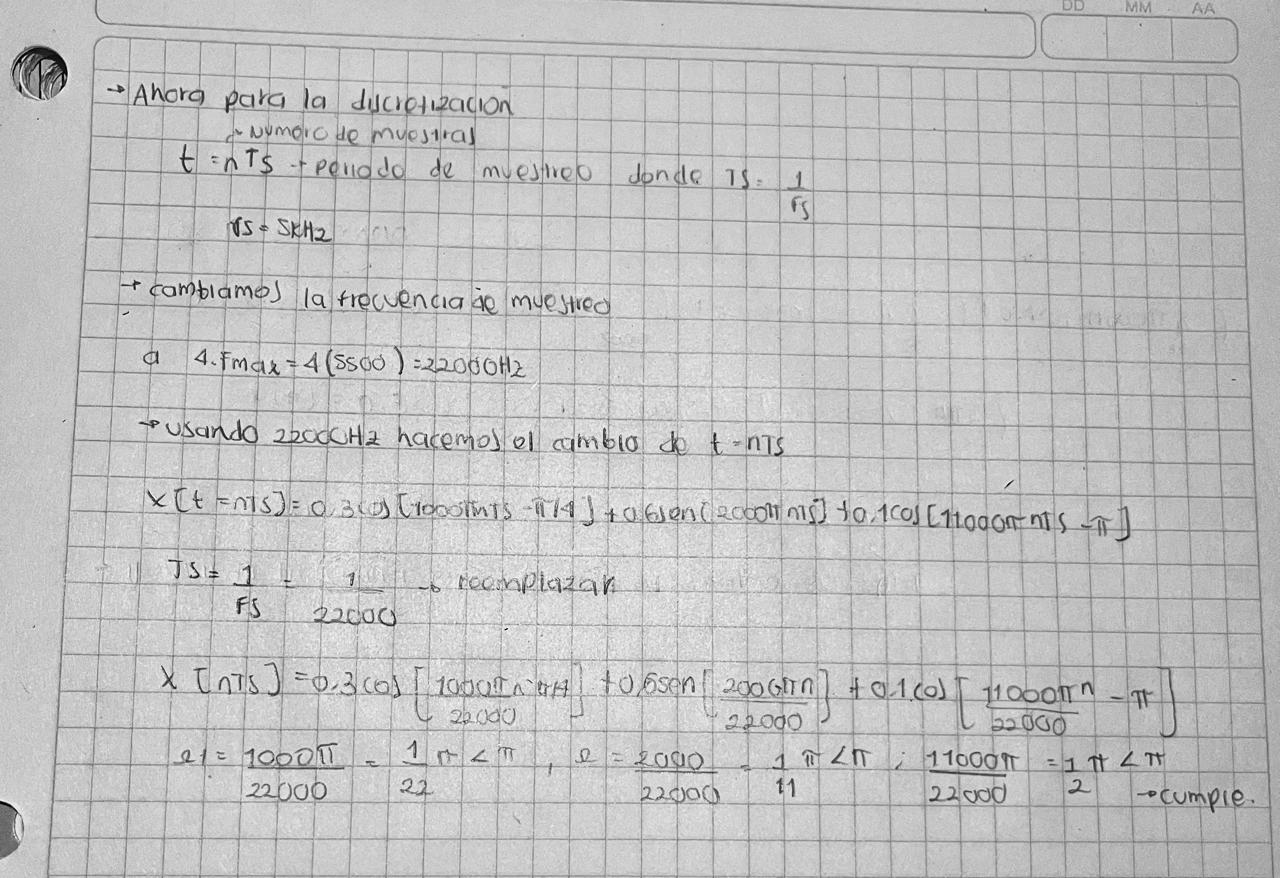

In [1]:
#importamos la libreria que vamos a utilizar
import numpy as np # importar libreria numpy
import matplotlib.pyplot as plt # importar libreria matplotlib con el alias plt para graficar
from scipy.spatial.distance import cdist #importamos la funcion cdist de scipy.spatial.distance

In [2]:
#definir las variables de la señal
A1 = 0.3 # corresponde a la amplitud 1
A2 = 0.6 # corresponde a la amplitud 2
A3 = 0.1 # corresponde a la amplitud 2

#ahora las frecuencias
w1 = 1000*np.pi # corresponde a la frecuencia 1
w2 = 2000*np.pi # corresponde a la frecuencia 2
w3 = 11000*np.pi # corresponde a la frecuencia 3

#para los angulos
a1 = -np.pi/4 # corresponde a la fase 1
a2 = 0 # corresponde a la fase 2
a3 = -np.pi # corresponde a la fase 3

In [3]:
#se calcula las frecuencias y periodos de nuestra señal
F1 = (w1/(2*np.pi)) #corresponde a la frecuencia 1
F2 = (w2/(2*np.pi)) #corresponde a la frecuencia 2
F3 = (w3/(2*np.pi)) #corresponde a la frecuencia 3

T1 = 1/F1 #corresponde al periodo 1
T2 = 1/F2 #corresponde al periodo 2
T3 = 1/F3 #corresponde al periodo 3

T = (1/500)#periodo de la señal cuasiperiodica

#imprimimos las frecuencias y periodos
print("Las frecuencias son: ", F1, F2, F3)
print("Los periodos son: ", T1, T2, T3)

Las frecuencias son:  499.99999999999994 999.9999999999999 5499.999999999999
Los periodos son:  0.002 0.001 0.00018181818181818186


In [4]:
#frecuencia y periodo de muestreo
Fs = float(input("Ingrese la frecuencia de muestreo: "))
while Fs < 2*max(F1,F2,F3):
  print("La frecuencia de muestreo debe ser mayor a 2 veces la frecuencia mas alta")
  Fs = float(input("Ingrese la frecuencia de muestreo: "))
Ts = 1/Fs
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante
tv = np.arange(ti,tf,Ts) #tiempo de muestreo


Ingrese la frecuencia de muestreo: 120000
La frecuencia de muestreo es:  120000.0
El periodo de muestreo es:  8.333333333333334e-06


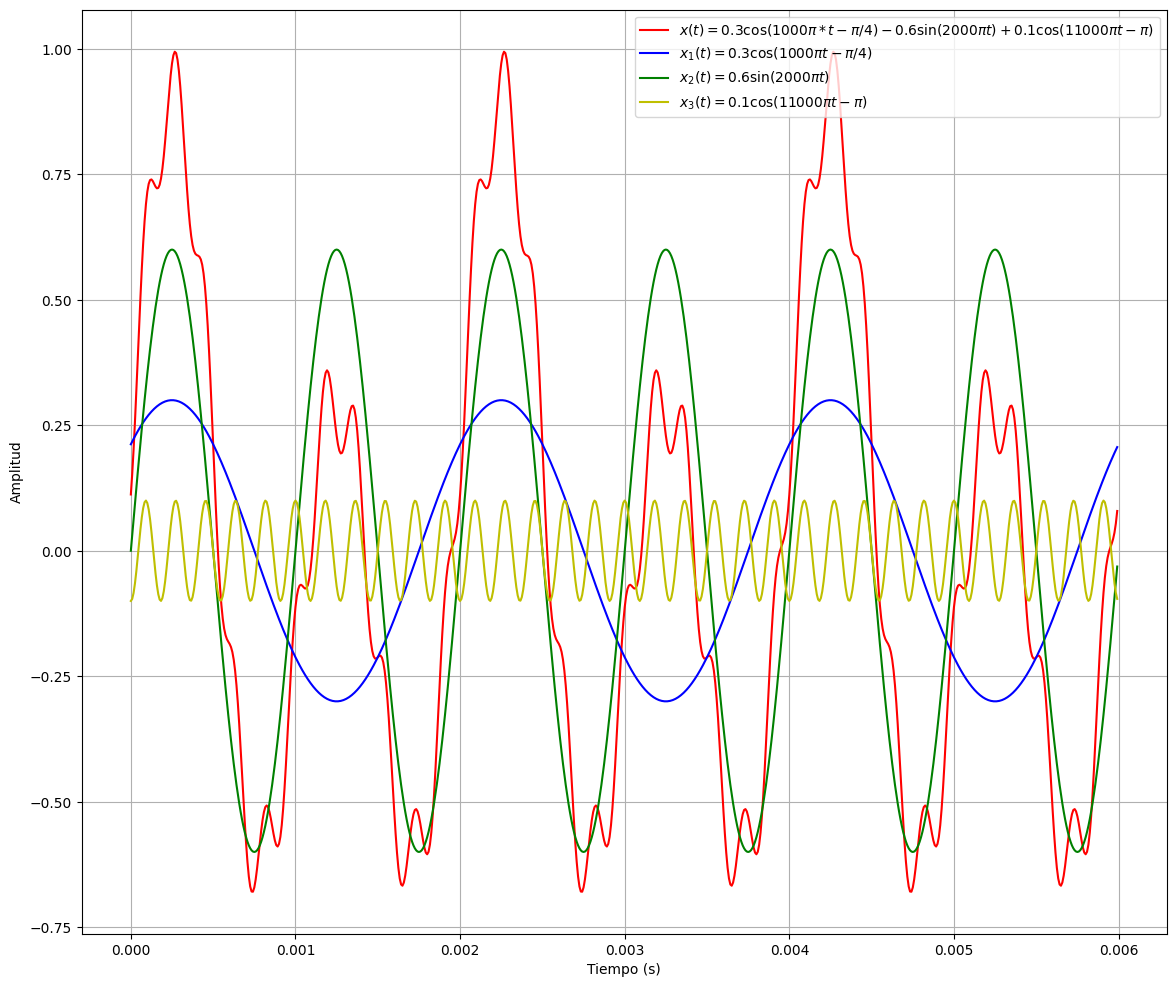

In [5]:
#se construye la señal
x1 = A1*np.cos(w1*tv+a1)
x2 = A2*np.sin(w2*tv+a2)
x3 = A3*np.cos(w3*tv+a3)
x = x1 + x2 + x3
plt.figure(figsize=(14, 12))
plt.plot(tv,x,'r',label='$x(t) = 0.3\cos(1000π*t-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$')
plt.plot(tv,x1,'b',label='$x_1(t) = 0.3\cos(1000πt-π/4)$')
plt.plot(tv,x2,'g',label='$x_2(t) = 0.6\sin(2000πt)$')
plt.plot(tv,x3,'y',label='$x_3(t) = 0.1\cos(11000πt-π)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

ingrese el valor minimo de la señal:-3
ingrese el valor maximo de la señal:3


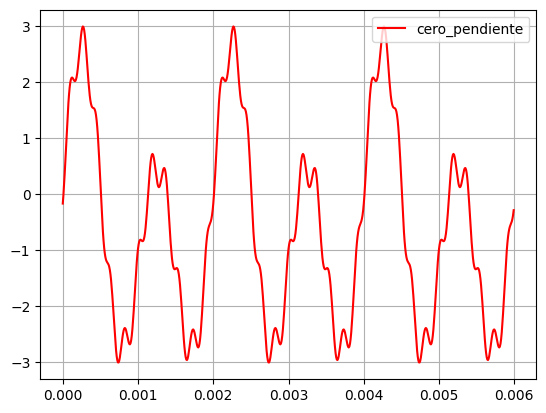

In [6]:
#se digitaliza la señan con cero y pendiente
#crear funcion en python
#tomamos la funcion crea por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c #resultado
  return yv

ymin = float(input("ingrese el valor minimo de la señal:"))
ymax = float(input("ingrese el valor maximo de la señal:"))

while ymax < ymin:
  print("el valor maximo debe ser mayor al minimo")
  ymin = float(input("ingrese el valor minimo de la señal:"))
  ymax = float(input("ingrese el valor maximo de la señal:"))
xcp = my_ceropen(x, ymin, ymax)
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [7]:
nbits = int(input("ingrese la catidad de bits:"))  #numero de bits que nos da el ejercicio
num_estados = 2**nbits #numero de estados de cuantificacion
v_cuan = np.linspace(ymin,ymax,num_estados) #vector llamado vq con los niveles de cuantificacion
print (num_estados)
print("Los estados de cuantificacion son: ", v_cuan)


ingrese la catidad de bits:5
32
Los estados de cuantificacion son:  [-3.         -2.80645161 -2.61290323 -2.41935484 -2.22580645 -2.03225806
 -1.83870968 -1.64516129 -1.4516129  -1.25806452 -1.06451613 -0.87096774
 -0.67741935 -0.48387097 -0.29032258 -0.09677419  0.09677419  0.29032258
  0.48387097  0.67741935  0.87096774  1.06451613  1.25806452  1.4516129
  1.64516129  1.83870968  2.03225806  2.22580645  2.41935484  2.61290323
  2.80645161  3.        ]


In [8]:
#función de cuantización punto a punto

def my_cuantizador(yn, v_cuan) : #yn punto a #cuantizar, v_cuan vector de estados

  Ne = v_cuan.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),v_cuan.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return v_cuan[ind]

In [9]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],v_cuan)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],v_cuan)) #apilar datos cuantizando si i>0


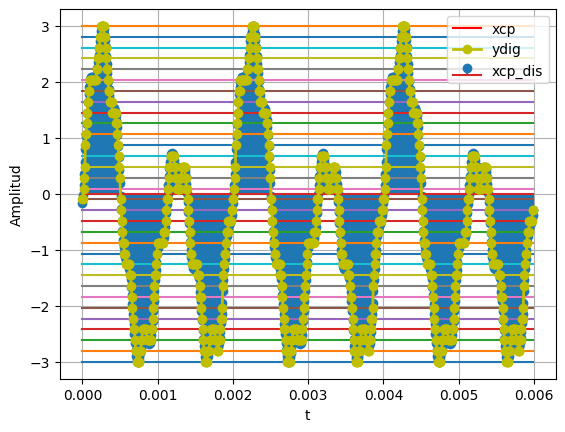

In [10]:
#graficamos las señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in v_cuan:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

**2 punto**
Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

x[n]=sin[100πn]+sin[600πn]

In [11]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-12 21:50:13--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 173.194.215.139, 173.194.215.100, 173.194.215.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-12 21:50:13--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s   

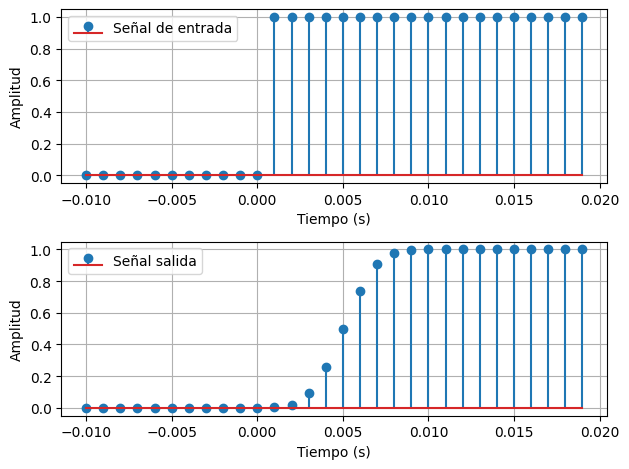

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u_one = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u_one)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u_one, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Primero vamos a verificar que el sistema es SLIT mirando si cumple la linealidad y la invariancia en el tiempo

Linealidad: y(t)=H{a1x1(t)+a2x2(t)}=a1H{x1(t)}+a2H{x2(t)}

Invariancia con el tiempo: y(t)=H{x(t)};y(t−to)=H{x(t−to)}



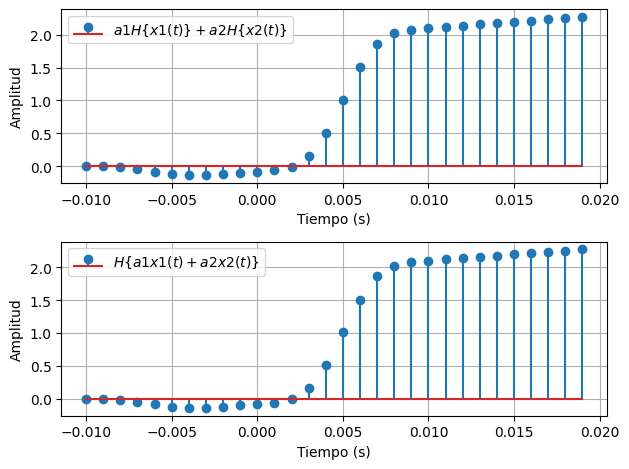

In [13]:
#Primero verificamos la linealidad del sistema con otra señal
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

a_1 = 2   #primer escalar
a_2 = 3   #segundo escalar

signal_u = np.heaviside(t,1) # función heaviside (escalon)
signal_u_scaled = a_1*signal_u  # función heaviside ya escalada
y_u = my_system.predict(signal_u)
y_u_scaled = my_system.predict(signal_u_scaled)

signal_v = np.sin(2*np.pi*t) #señal con la que se compara - funcion seno
signal_v_scaled = a_2*signal_v #funcion seno escalada
y_v = my_system.predict(signal_v) # respuesta sistema
y_v_scaled = my_system.predict(signal_v_scaled) #respuesta al sistema de funciones escaladas
signals_scaled= signal_u_scaled + signal_v_scaled #suma de las funciones escaladas
P1 = a_1*y_u + a_2*y_v #verificar linealidad
P2 = y_u_scaled + y_v_scaled # verificar linealidad

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, P1, label='$a1H\{x1(t)\}+a2H\{x2(t)\}$')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,P2, label='$H \{a1x1(t)+a2x2(t)\}$')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

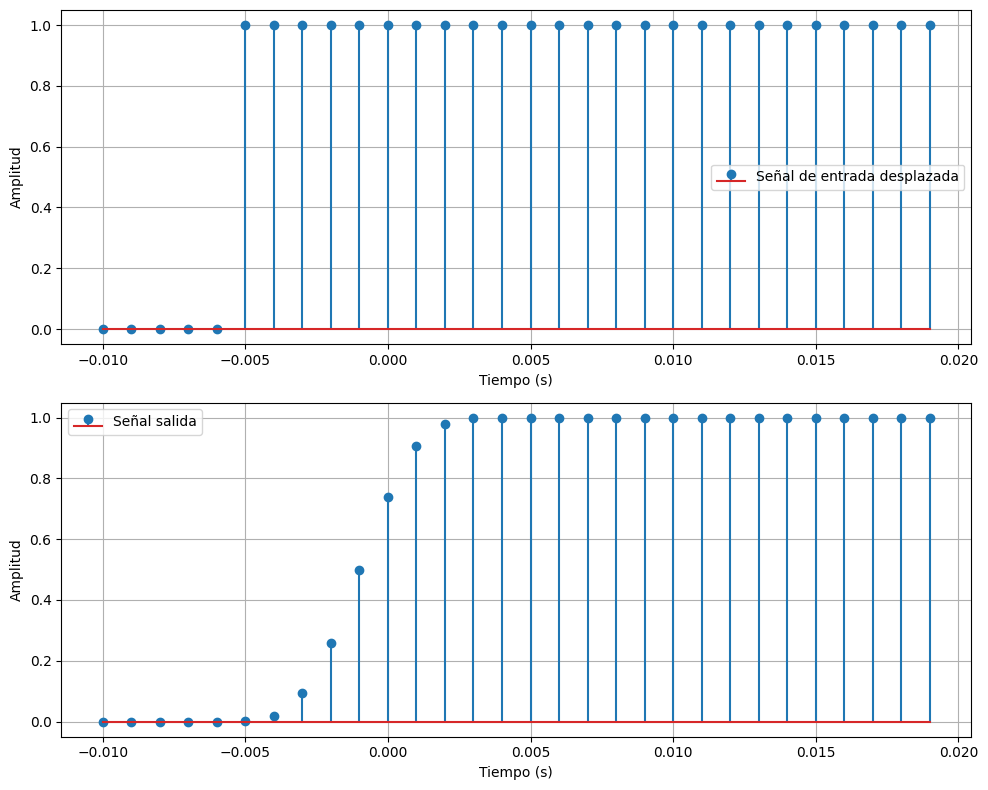

In [14]:
#verificamos la invariancia en el tiempo
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo # crear vector
to = -0.0058 # poner un valor dentro del rango desplazamiento
signal_u = np.heaviside(t-to,1) # función heaviside desplazada
y_u = my_system.predict(signal_u) #respuesta ecalamiento



# Visualización de las señales

fig, axs = plt.subplots(2,1, figsize=(10, 8))
axs[0].stem(t, signal_u, label='Señal de entrada desplazada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

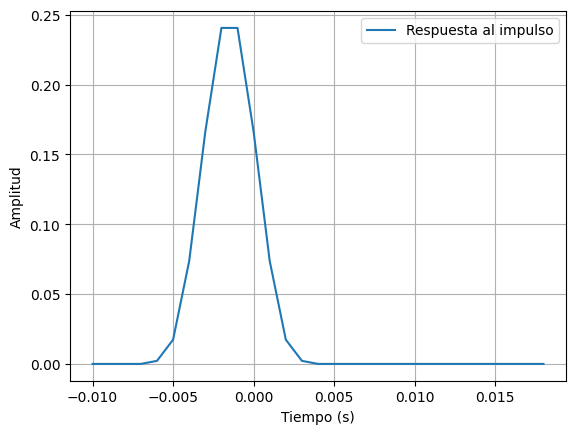

In [15]:
#ya que se verifico es SLIT vamos a determinar su respuesta al impulso
h_n = np.diff(y_u) #encontramos la respuesta al impulso derivando la salida del sistema
plt.figure()

# Ajustamos el tamaño de t para que coincida con h_n
t_adjusted = t[:-1]  # eliminamos el último elemento de t - IA

plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

In [16]:
n = t  #se crea el arreglo n para las muestras


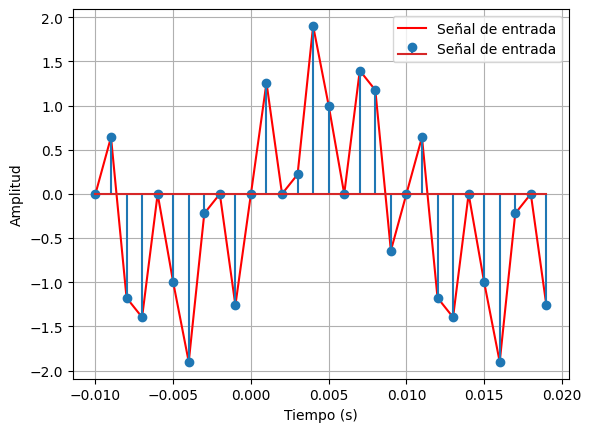

In [17]:

x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n) #señal dada en el ejercicio
#señal de entrada
plt.figure()
plt.plot(n, x_n,'r',label='Señal de entrada')
plt.stem(n, x_n, label='Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

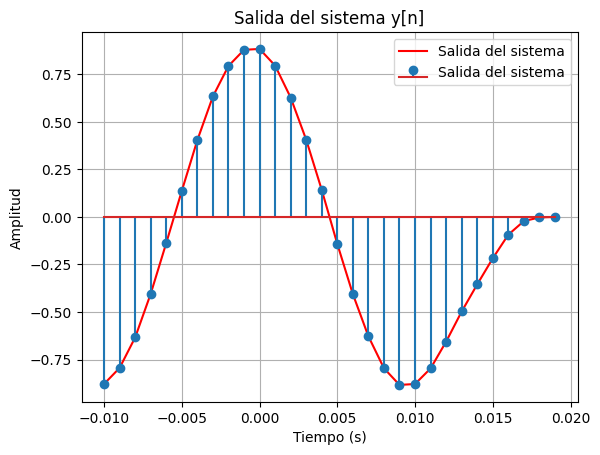

In [18]:
# Realizar la convolución
y_output = np.convolve(x_n, h_n, mode='same')

# Visualización de la salida
plt.figure()
plt.plot(n, y_output,'r',label='Salida del sistema')
plt.stem(n, y_output[:len(t)], label='Salida del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()